# Import the API from PyPI

In [147]:
pip install DrawVennDiagram

Note: you may need to restart the kernel to use updated packages.


# 2 Set Venn Diagram using API

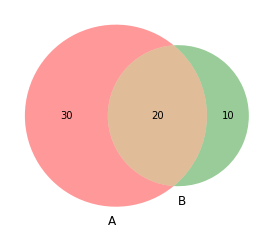

In [148]:
sets = (30,10,20)
labels = ('A','B')

v = drawVenn(sets, labels)

# 3 Set Venn Diagram using API
- The API will automatically create a 3-set Venn diagram from the set and label tuples given to the drawVenn object.
    - The API will generate a 2-set or 3-set diagram automatically based on the number if set labels inputs.

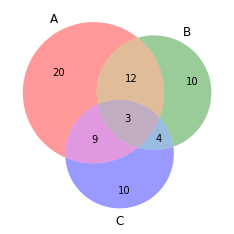

In [149]:
sets = (20, 10, 12, 10, 9, 4, 3)
labels = ('A','B','C')

v = drawVenn(sets, labels)

# 2 Set - Weighted vs Unweighted

## Weighted
- A weighted set has size correlated to the magnitude of the set value.

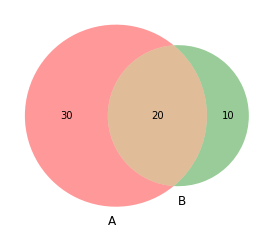

In [150]:
sets = (30,10,20)
labels = ('A','B')

v = drawVenn(sets, labels)

## Unweighted
- Set the third argument of the drawVenn object to True to produce unweighted diagram.
    - The API will automatically recalibrate the outputted diagram.
- Unweighted just allows all sets to be equal size, regarless of the values in the sets.

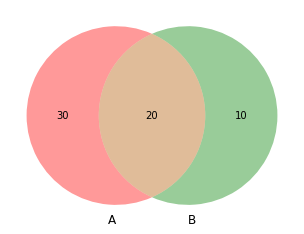

In [151]:
sets = (30,10,20)
labels = ('A','B')

v = drawVenn(sets, labels,True)

# 3 Set - Weighted vs Unweighted

## Weighted

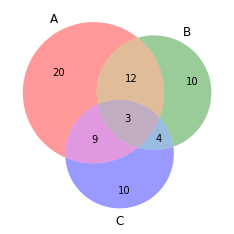

In [152]:
sets=(20, 10, 12, 10, 9, 4, 3)
labels=('A','B','C')

v = drawVenn(sets,labels)

## Unweighted

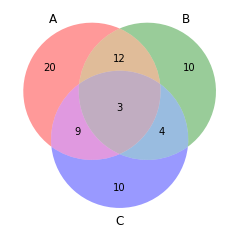

In [153]:
sets=(20, 10, 12, 10, 9, 4, 3)
labels=('A','B','C')

v = drawVenn(sets,labels,True)

# Modify the Venn Diagram set colours
- Set colours can be manually selected before the drawVenn object is created.
- The drawVenn API will default the set colours to red,green,blue.

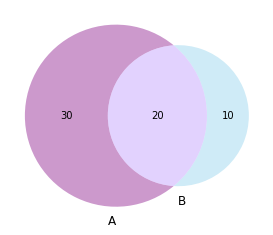

In [157]:
sets = (30,10,20)
labels = ('A','B')

colours = ('purple','skyblue')

v = drawVenn(sets,labels,colors=colours)

- Set colours can also be manually changed after the drawVenn object has been created.

# Modify the Circle border 

- Solid circle border can be created using the set_solid_circles() method.

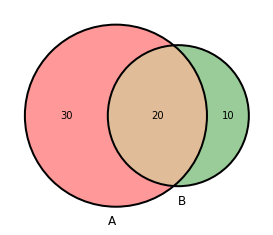

In [155]:
sets = (30,10,20)
labels = ('A','B')

v = drawVenn(sets, labels)
v.set_solid_circles()

- Dashed circle borders can be added using the set_dashed_circles() method.

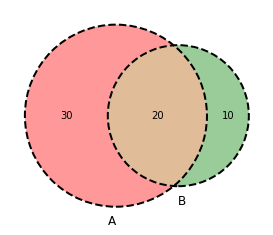

In [156]:
sets = (30,10,20)
labels = ('A','B')

v = drawVenn(sets, labels)
v.set_dashed_circles()

# Read in Biological Data

In [555]:
def read_data(file):
    with open(file) as f:
        lines=f.readlines()
        labels=[]
        values=[]
        for line in lines: # first three as we can only handle three sets   *** connected
            labels.append(line.split(":")[0])
            values.append(line.split(":")[1].split(","))
        #clean up the ";" and "\n"
        for v in values:
            v[-1] = v[-1].replace(';','')
            v[-1] = v[-1].rstrip()
        #map string values to unique integers for API input
        mapped_values=[]
        #1) FLATTEN
        flat_values = [item for sublist in values for item in sublist]
        #2) MAPPING
        d = dict([(y,x+1) for x,y in enumerate(sorted(set(flat_values)))])
        #3) SLICE BACK TO ORIGNAL SHAPE
        mapped_values.append([d[x] for x in flat_values[0:6]]) #values[0] *** connected
        mapped_values.append([d[x] for x in flat_values[6:20]])  #values[1]
        mapped_values.append([d[x] for x in flat_values[20:36]])  #values[2]
        #mapped_values.append([d[x] for x in flat_values[36:53]])  #values[3]
        #mapped_values.append([d[x] for x in flat_values[53:71]])  #values[4]
        #mapped_values.append([d[x] for x in flat_values[71:89]])  #values[4]        
    return [labels,mapped_values,values]
            
        
    
file = "test_model.ivenn"
data = read_data(file)

labels = data[0]
mapped_values = data[1]
values = data[2]

print("Labels:",labels,"\n")
print("Mapped Values:",mapped_values,"\n")
#print("Origninal Values:",values,"\n")

Labels: ['name1', 'nAme 2', 'Na_Me3', 'Na_Me4', 'Na_Me', 'Na_Me'] 

Mapped Values: [[22, 49, 25, 21, 2, 5], [23, 50, 25, 21, 2, 5, 8, 9, 12, 27, 38, 44, 53, 18], [22, 49, 25, 21, 2, 5, 48, 35, 13, 41, 18, 24, 27, 30, 38, 44]] 



In [556]:
flat_values = [item for sublist in values for item in sublist]
d = dict([(y,x+1) for x,y in enumerate(sorted(set(flat_values)))])

print(flat_values[0:6])#v0 0+len(v0)= 0+6 = 6
print(flat_values[6:20])#v1 6+len(v1)= 6+14 =20
print(flat_values[20:36])
print(flat_values[36:53])
print(flat_values[53:71])
print(flat_values[71:89])

['e1', 'w2', 'f3', 'e', '3', '4']
['e122', 'w23', 'f3', 'e', '3', '4', '5', '6', '7', 'g', 'r', 't', 'y', 'd']
['e1', 'w2', 'f3', 'e', '3', '4', 'w', 'q', 'a', 's', 'd', 'f', 'g', 'h', 'r', 't']
['4', 'w', 'q', 'a', 's', 'd', 'f', 'g', 'h', 'r', 't', 'm', 'b', 'v', '65', '34', '23']
['44', 'w4', 'q4', 'a4', 's4', 'd4', 'f4', 'g4', 'h4', 'r4', 't4', 'g', 'm', 'b', 'v', '653', '343', '23']
['43', 'w3', 'q3', 'a3', 's3', 'd3', 'f3', 'g3', 'h3', 'r3', 't3', 'g', 'm3', 'b3', 'v', '65', '34', '23']


# Test Biological data in API

In [557]:
#set1 = set([1,2,3,10,11,12,13,14,15,16])
#set2 = set([3,4,5])

#sets = (set1,set2)
#labels = ('A','B')

#v = drawVenn(sets, labels)

In [558]:
print(mapped_values[0])
print(values[0])
print()
print(mapped_values[1])
print(values[1])

[22, 49, 25, 21, 2, 5]
['e1', 'w2', 'f3', 'e', '3', '4']

[23, 50, 25, 21, 2, 5, 8, 9, 12, 27, 38, 44, 53, 18]
['e122', 'w23', 'f3', 'e', '3', '4', '5', '6', '7', 'g', 'r', 't', 'y', 'd']


In [559]:
print(labels)

['name1', 'nAme 2', 'Na_Me3', 'Na_Me4', 'Na_Me', 'Na_Me']


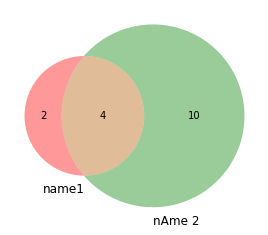

In [560]:
set1 = set(mapped_values[0])
set2 = set(mapped_values[1])

sets = (set1,set2)
l2 = labels[0:2]

drawVenn(sets,l2)

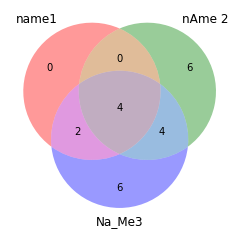

In [562]:
set1 = set(mapped_values[0])
set2 = set(mapped_values[1])
set3 = set(mapped_values[2])

sets = (set1,set2,set3)
l3 = labels[0:3]

drawVenn(sets,l3,True)

# ******** TESTING BELOW *********

## How to map string values to unique integer

In [422]:
l = ['e1','bat','e','car','pet','bat']


d = dict([(y,x+1) for x,y in enumerate(sorted(set(l)))])

print([d[x] for x in l[0:3]])

[4, 1, 3]


In [424]:
#2
print(values,"\n")

print(len(values[0]),"\n")

flat_values = [item for sublist in values for item in sublist]

print(flat_values)

[['e1', 'w2', 'f3', 'e', '3', '4'], ['e122', 'w23', 'f3', 'e', '3', '4', '5', '6', '7', 'g', 'r', 't', 'y', 'd']] 

6 

['e1', 'w2', 'f3', 'e', '3', '4', 'e122', 'w23', 'f3', 'e', '3', '4', '5', '6', '7', 'g', 'r', 't', 'y', 'd']


In [463]:
print("Values:",values,"\n")

flat_values = [item for sublist in values for item in sublist]
print("Flat values:",flat_values)

#1) flatten the list to one large list
#2) map the flat list
#3) slice the list back to original shape and save in mapped_values


# MAPPING
d = dict([(y,x+1) for x,y in enumerate(sorted(set(flat_values)))])
print("Mapped Flat list: ",[d[x] for x in flat_values],"\n") # large list of mapped 

# slice large list down to smaller lists
#[6]
#[14]
#[16]

mapped_v = []
mapped_v.append([d[x] for x in flat_values[0:len(values[0])]])
mapped_v.append([d[x] for x in flat_values[len(values[0]):]])
print("Mapped Values:",mapped_v)


#print([d[x] for x in flat_values[0:len(values[0])]]) # values[0]
#print([d[x] for x in flat_values[len(values[0]):]]) # values[1]

#print(values[0][0:len(values[0])])
#print([d[x] for x in flat_values[0:len(values[1])]]) # large list of mapped 


Values: [['e1', 'w2', 'f3', 'e', '3', '4'], ['e122', 'w23', 'f3', 'e', '3', '4', '5', '6', '7', 'g', 'r', 't', 'y', 'd']] 

Flat values: ['e1', 'w2', 'f3', 'e', '3', '4', 'e122', 'w23', 'f3', 'e', '3', '4', '5', '6', '7', 'g', 'r', 't', 'y', 'd']
Mapped Flat list:  [8, 14, 10, 7, 1, 2, 9, 15, 10, 7, 1, 2, 3, 4, 5, 11, 12, 13, 16, 6] 

Mapped Values: [[8, 14, 10, 7, 1, 2], [9, 15, 10, 7, 1, 2, 3, 4, 5, 11, 12, 13, 16, 6]]


## Map biological values to unique integer for the API.
- since API only allows integer values

In [321]:
list=[]
for v in values:
    d = dict([(y,x+1) for x,y in enumerate(sorted(set(v)))])
    list.append(([d[x] for x in v]))
    
print(list)

[[4, 6, 5, 3, 1, 2], [8, 13, 9, 7, 1, 2, 3, 4, 5, 10, 11, 12, 14, 6], [6, 16, 8, 5, 1, 2, 15, 11, 3, 13, 4, 7, 9, 10, 12, 14]]
